In [ ]:
# Calculate and plot monthly lag correlations between two datasets
# Here CESM and reanalysis that have alreayd had the monthly time series extracted and saved as a timeseries in a .txt file


In [1]:
import HydroErr as he
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import seaborn as sns
from seaborn_qqplot import pplot
from glob import glob
import os
import re
from datetime import datetime
#from scipy import signal

In [2]:
# Specify varible name. This is used below in file, directory, and plotting names 
chosen_var_CESM = 'et'
chosen_var_reanalysis = 'et'

In [3]:
# specify the directories that the datasets to be compared are saved in.
# because I wasn't 100% consistent with directory naming, some of these will need to be updated even though the variable names should work as specified

#f'/Volumes/MCO_SSD/data/CESM2/{chosen_var}/{chosen_freq}/CONUS/'

dir= f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/grouped_subbasins/east_west/*.txt'
dir2 = f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/*.txt'
dir5 = f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/grouped_subbasins/entirebasin/*.txt'

dir3 = f'/Volumes/MCO_SSD/data/subbasin_data/Livneh/{chosen_var_reanalysis}/grouped_subbasins/east_west/*.txt'
dir4 = f'/Volumes/MCO_SSD/data/subbasin_data/Livneh/{chosen_var_reanalysis}/*.txt'
dir6 = f'/Volumes/MCO_SSD/data/subbasin_data/Livneh/{chosen_var_reanalysis}/grouped_subbasins/entirebasin/*.txt'

In [4]:
# get list of all files for the two categories of datasets. save each of these as a list to be used in the loop

dir_list = glob(dir, recursive=True)
dir_list2 = glob(dir2, recursive=True)
dir_list3 = glob(dir3, recursive=True)
dir_list4 = glob(dir4, recursive=True)
dir_list5 = glob(dir5, recursive=True)
dir_list6 = glob(dir6, recursive=True)

In [5]:
# Basin names
# keep in this order, and add full basin at the end, because it determines the order of the plotting

#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region','Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region'] # Entire.Mississippi.Region
#subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region']
subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region'] # Entire.Mississippi.Region


In [6]:
# Get a full list of files by basins specified above 
# Double check which files are being read in, to confirm that all have been found

final_filtered_dir_list = []
print(final_filtered_dir_list)
for basin in subbasin_list:
    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x] 
    #print(filtered_dir_list)
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    #print(filtered_dir_list_2)
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    #print(filtered_dir_list_3)
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    final_filtered_dir_list = final_filtered_dir_list
    print(final_filtered_dir_list)
    

[]
Eastern.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/et/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_et_qsoil.txt', '/Volumes/MCO_SSD/data/subbasin_data/Livneh/et/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_Livneh_et.txt']
Western.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/et/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_et_qsoil.txt', '/Volumes/MCO_SSD/data/subbasin_data/Livneh/et/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_Livneh_et.txt']
Entire.Mississippi.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/et/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_CESM_et_qsoil.txt', '/Volumes/MCO_SSD/data/subbasin_data/Livneh/et/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_Livneh_et.txt']


In [32]:
# Setup dataframes for calculations

df = pd.DataFrame()
df_2 = pd.DataFrame()
df_original_all = pd.DataFrame()
df_lagcor = pd.DataFrame()

df_means_all = pd.DataFrame()
df_dfmeans = pd.DataFrame()
df_df2means = pd.DataFrame()


df_lagcor_all = pd.DataFrame()
df_peakmonths_all = pd.DataFrame()

i = 0

# loop through basins
for basin in subbasin_list:
    print(basin)
    basin_num = subbasin_list.index(basin)

    # compile directory lists to access datasets
    filtered_dir_list = [x for x in dir_list if basin in x] 
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    # setup basins names and directory paths
    basin_name = basin
    directory1 = final_filtered_dir_list[i]
    directory2 = final_filtered_dir_list[i+1]
    name1 = os.path.basename(directory1)
    name2 = os.path.basename(directory2)
    print(name1)
    print(name2)
    
    # setup dataframe1  
    df = pd.read_csv(directory1, sep=" ", header = 0)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['DATE2'] = df['DATE'] 
    df['month_txt'] = df['DATE'].dt.strftime("%b")
    df = df[(df['DATE'] >='1950-01-01') & (df['DATE'] <='2005-01-01')]
    df = df.set_index('DATE')
    #df['value'] = df['value']*(2629800) # CESM units are mm/s, so multiply by seconds in a month to convert to mm. Since time step is monthly, this converts to common time step of mm/month.
    #df['value'] = (df['value'] - df['value'].mean()) / df['value'].std()  #can normalize the values to be between -1 and 1 for the correlation calcualtions below if desired
    df['dataset'] = "CESMLME"
    df['basin'] = basin
    df_means = df.groupby('month').agg({'value': 'mean', 'month_txt':'first', 'dataset':'first', 'basin':'first'})
    df_means = df_means.reset_index()
    #df_means.insert(2,'dataset_name',name1) #name = CESM
    
    # setup dataframe2
    df_2 = pd.read_csv(directory2, sep=" ", header = 0)
    df_2['DATE'] = pd.to_datetime(df_2['DATE'])
    df_2['DATE2'] = df_2['DATE']
    df_2['month_txt'] = df_2['DATE'].dt.strftime("%b")
    df_2 = df_2[(df_2['DATE'] >='1950-01-01') & (df_2['DATE'] <='2005-01-01')]
    df_2 = df_2.set_index('DATE')
    #df_2['value'] = df_2['value']*(1000) # ERA5 units are m, so multiply by 1000 to convert to mm. Since time step is monthly, this converts to common time step of mm/month.
    #df_2['value'] = (df_2['value'] - df_2['value'].mean()) / df_2['value'].std()
    df_2['dataset'] = "ERA5"
    df_2['basin'] = basin
    df2_means = df_2.groupby('month').agg({'value': 'mean', 'month_txt':'first', 'dataset':'first', 'basin':'first'})
    df2_means = df2_means.reset_index()
    #df2_means.insert(2,'dataset_name',name3) #name = ERA5
    
    df_dfmeans = df_dfmeans.append(df_means, ignore_index = True)
    df_df2means = df_df2means.append(df2_means, ignore_index = True)
    
    df_means_all = df_means_all.append(df_means, ignore_index = True)
    df_means_all = df_means_all.append(df2_means, ignore_index = True)

#print(df_means_all)

#print(df_dfmeans)
#print(df_df2means)


Eastern.Mississippi.Basin.Region
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_et_qsoil.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_Livneh_et.txt
Western.Mississippi.Basin.Region
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_et_qsoil.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_Livneh_et.txt
Entire.Mississippi.Region
subbasin_monthly_avg_Entire.Mississippi.Region_CESM_et_qsoil.txt
subbasin_monthly_avg_Entire.Mississippi.Region_Livneh_et.txt


In [13]:
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)

In [33]:
# Calculate lag correlation between CESM and reanalysis data (called ERA5 regardless of dataset here) by basin
df_lagcor_all = pd.DataFrame()
df_lagcor = pd.DataFrame()

for thisbasin in df_dfmeans['basin'].unique():  # get unique basin in dataset
   
    CESM_basin_df = df_dfmeans.loc[df_dfmeans['basin']== thisbasin]
    ERA5_basin_df = df_df2means.loc[df_df2means['basin']== thisbasin]

    # print(CESM_basin_df)
    # print(ERA5_basin_df)

    def lag_corr(x, y):
        return x.corr(y)

    for lag in range(-11, 12):
    #     thislag = lag[i]
    #     type(thislag)
        lagged_values = CESM_basin_df['value'].shift(lag).fillna(0)
        corr_values = lag_corr(ERA5_basin_df['value'], lagged_values)
        #print(f'Lag {lag} correlation: {corr_values}')

        # create a new dataframe to store the results
        df_lagcor = pd.DataFrame({'lags': lag, 'correlation': corr_values, 'basin': thisbasin}, index=[0]) # had to add this index=[0] to make this line work here, unlike in other places
        #print(df_lagcor)

        df_lagcor_all = df_lagcor_all.append(df_lagcor, ignore_index = True)
    
#print(df_lagcor_all)
df_lagcor_all

,lags,correlation,basin
0,-11,-0.366695,Eastern.Mississippi.Basin.Region
1,-10,-0.489868,Eastern.Mississippi.Basin.Region
2,-9,-0.528747,Eastern.Mississippi.Basin.Region
3,-8,-0.504405,Eastern.Mississippi.Basin.Region
4,-7,-0.424809,Eastern.Mississippi.Basin.Region
...,...,...,...
64,7,-0.509720,Entire.Mississippi.Region
65,8,-0.518826,Entire.Mississippi.Region
66,9,-0.527326,Entire.Mississippi.Region
67,10,-0.474669,Entire.Mississippi.Region


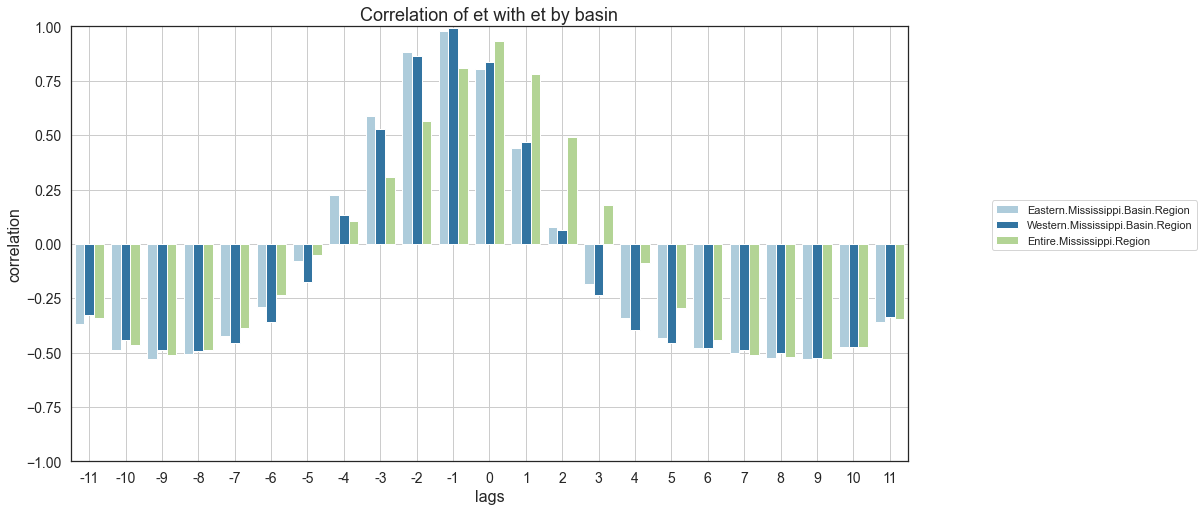

In [15]:
## update to make each subbasin a color so that it's more easily identifiable between figures

plt.figure(figsize=(15,8))
sns.set(style='white', rc={'axes.labelsize': 16, 'axes.titlesize': 18, 'font.size': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
#mypalette = sns.color_palette("CMRmap_r", 3) #sns.color_palette("PuBuGn", saturation = 1.5)
mypalette = sns.color_palette("Dark2", 3) #sns.color_palette("PuBuGn", saturation = 1.5)
ax = sns.barplot(data = df_lagcor_all, x= "lags", y = "correlation", hue = 'basin', palette = "Paired") #, alpha = 1 palette = mypalette, , hue = 'basin' # palettes with three distinct colors: Paired, Paired_r, Set1, nipy_spectral, tab20, CMRmap, CMRmap_r, Dark2, RdYlBu 
#plt.xlim([47.5,60.5]) # counts from position rather than lag with this barplot for some reason
plt.ylim(-1,1)
plt.legend(bbox_to_anchor=(1.1, 0.6),borderaxespad=0)
#plt.legend().remove()
plt.title(f'Correlation of {chosen_var_CESM} with {chosen_var_reanalysis} by basin', fontsize=18)

plt.grid(True)
plt.savefig(f'/Volumes/MCO_SSD/data/plots/validation_paper/lagcorrelation_plot_{chosen_var_CESM}.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Reset the display options to default if needed
pd.reset_option('display.max_rows')